# Introduction to Synthetic Aperture Radar Using Python and MATLAB

## by Andy Harrison - &copy; Artech House 2022

---

## Example 4.5.2 and 4.5.3 Backprojection Algorithm - Learjet and Backhoe
---

**Import Modules**

In [16]:
%matplotlib inline

import numpy as np

import backprojection as bp

from scipy.constants import speed_of_light

from scipy.io import loadmat

from matplotlib import pyplot as plt

**Set the image span (m)**

In [2]:
x_span = 10

y_span = 10

z_span = 10

**Number of bins in x, y and z**

In [3]:
nx = 50

ny = 50

nz = 50

**Set the dynamic range for the plot (dB)**

In [4]:
dynamic_range = 40

**Set the polarization**

In [5]:
polarization = 'VV'

**Set the window type**

In [6]:
window_type = 'Hamming'

**Set up the image space**

In [7]:
x = np.linspace(-0.5 * x_span, 0.5 * x_span, int(nx))

y = np.linspace(-0.5 * y_span, 0.5 * y_span, int(ny))

z = np.linspace(-0.5 * z_span, 0.5 * z_span, int(nz))

[x_image, y_image, z_image] = np.meshgrid(x, y, z)

**Set the FFT length for this dataset**

In [8]:
fft_length = 2 * np.ceil(np.log2(8000))

**Load the selected target**

In [9]:
data = loadmat('lear_0el_90az.mat')

signal = np.squeeze(data['vv'])

az = np.squeeze(data['az'])

el = np.squeeze(data['el'])

frequency = np.squeeze(data['freq'])

nf = np.squeeze(data['numFreq'])

na = np.squeeze(data['numIncAz'])

ne = np.squeeze(data['numIncEl'])

**Get the sensor azimuth and elevation**

In [10]:
sensor_az = np.radians(az + 15)

sensor_el = np.radians(el - 15)

**Get the window coefficients**

In [11]:
coefficients = np.ones_like(signal)


if window_type == 'Hanning':
    
    h1 = np.hanning(int(nf))
    
    h2 = np.hanning(int(na))
    
    h3 = np.hanning(int(ne))
    
elif window_type == 'Hamming':
    
    h1 = np.hamming(int(nf))
    
    h2 = np.hamming(int(na))
    
    h3 = np.hamming(int(ne))
    
    
for i in range(int(nf)):
    
    for j in range(int(na)):
        
        for k in range(int(ne)):

            coefficients[i, j, k] = (h1[i] * h2[j] * h3[k] )**(1/3)

**Apply the selected window**

In [12]:
signal = signal * coefficients

**Set up the angular grid**

In [13]:
az_grid, el_grid = np.meshgrid(sensor_az, sensor_el)

**Reconstruct the image**

In [14]:
bp_image = bp.reconstruct3(signal, az_grid, el_grid, x_image, y_image, z_image, frequency, int(fft_length))

**Plot the backprojected image**

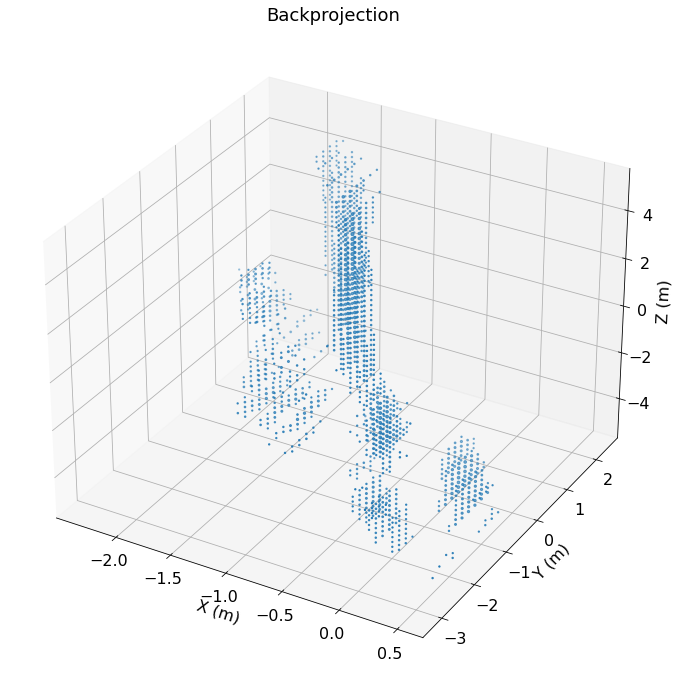

In [24]:
# Set the figure size

plt.rcParams["figure.figsize"] = (15, 12)



# Set the dynamic range of the points to be displayed

dynamic_range = 15


# Normalize the signal

a = abs(bp_image) / np.max(abs(bp_image))


# Get the indices for the data

plot_index = a > 10.0**(-abs(dynamic_range) / 20)

xs = x_image[plot_index].tolist()

ys = y_image[plot_index].tolist()

zs = z_image[plot_index].tolist()

rs = (a[plot_index] * 10).tolist()





# Scatter plot

fig = plt.figure()

ax = fig.add_subplot(projection='3d')

ax.scatter(xs, ys, zs, s=rs, cmap='Greys')



# Set the plot title and labels

ax.set_title('Backprojection', size=18)

ax.set_xlabel('X (m)', size=16)

ax.set_ylabel('Y (m)', size=16)

ax.set_zlabel('Z (m)', size=16)



# Set the tick label size

ax.tick_params(labelsize=16)



# Show the figure

plt.show()